In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import os

In [13]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv(os.getcwd() + '/fcc-forum-pageviews.csv',
                 parse_dates=['date'], index_col='date')


In [20]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [21]:
# Clean data
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) &
            (df['value'] <= df['value'].quantile(0.975))]


In [22]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(32, 10), dpi=100)
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    sns.lineplot(data=df, legend=False)

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig


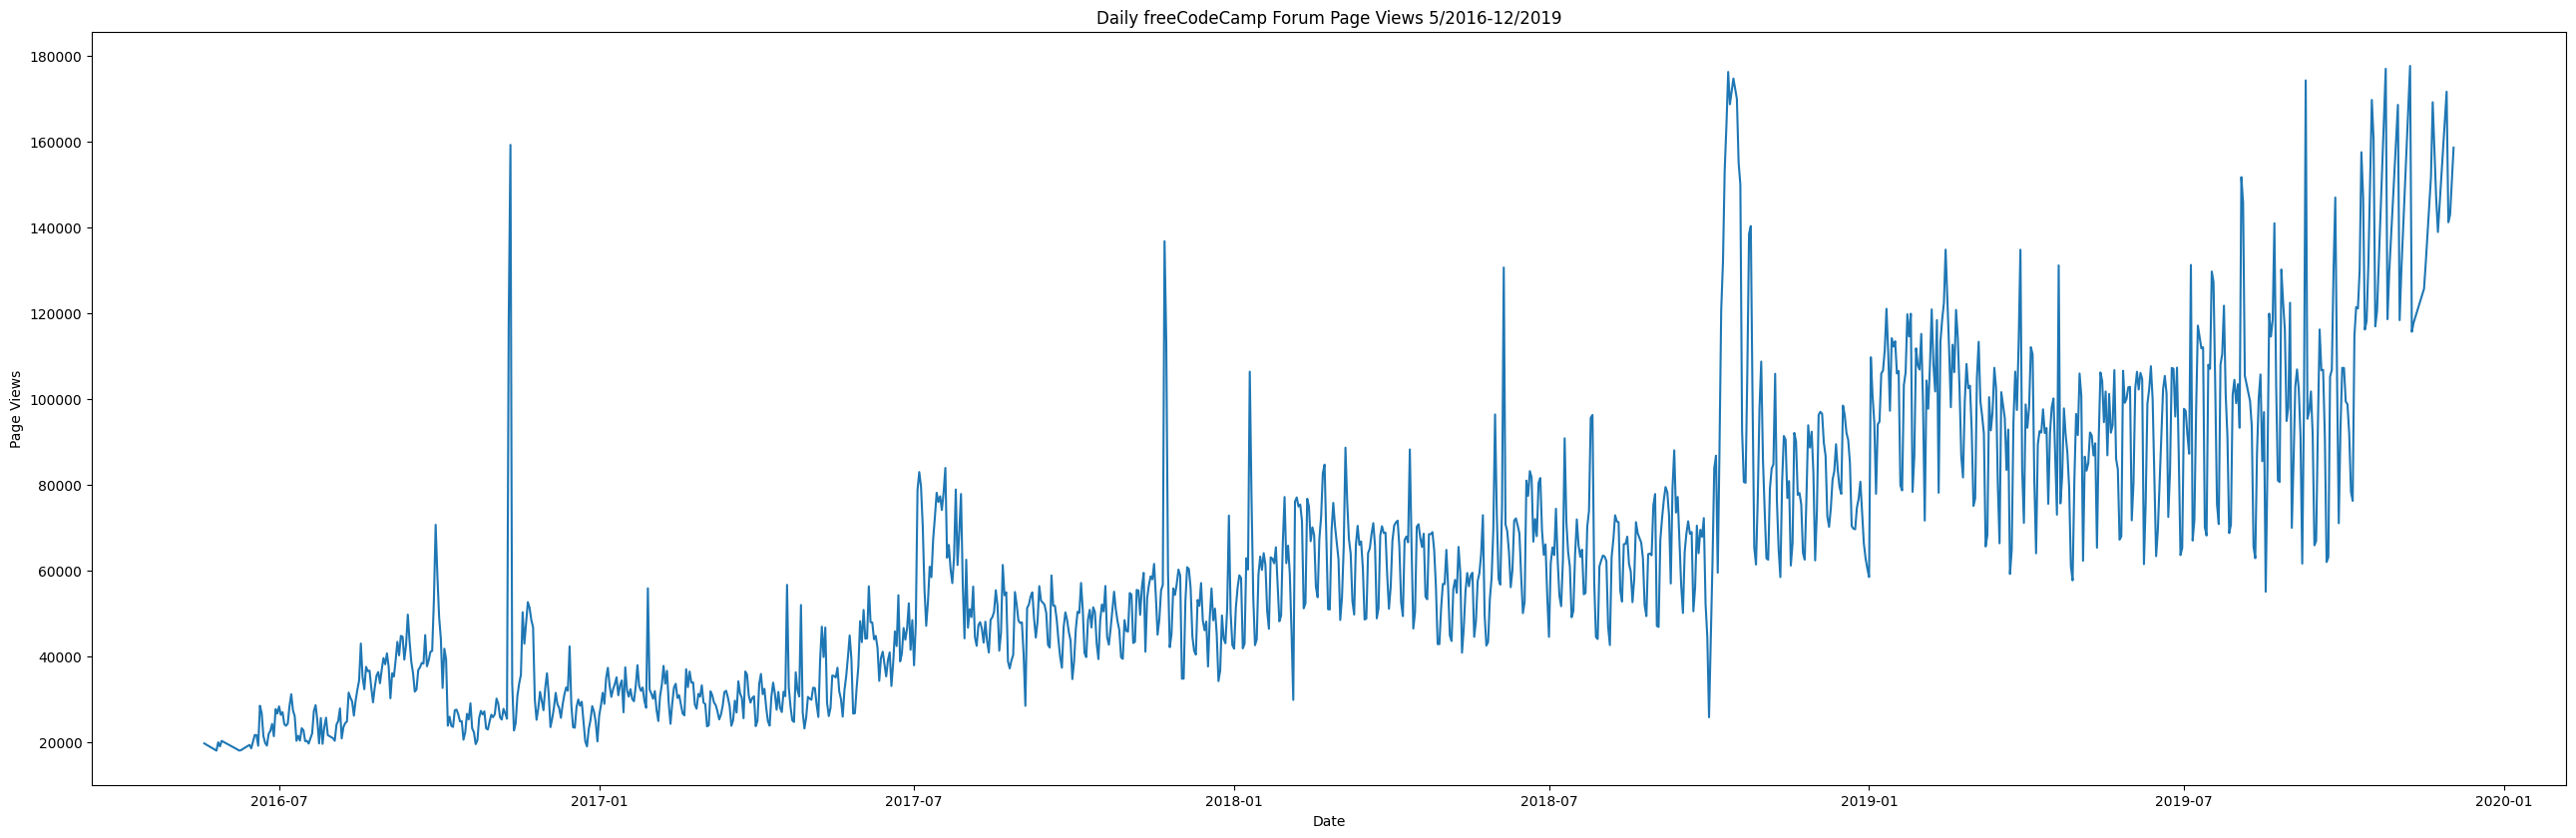

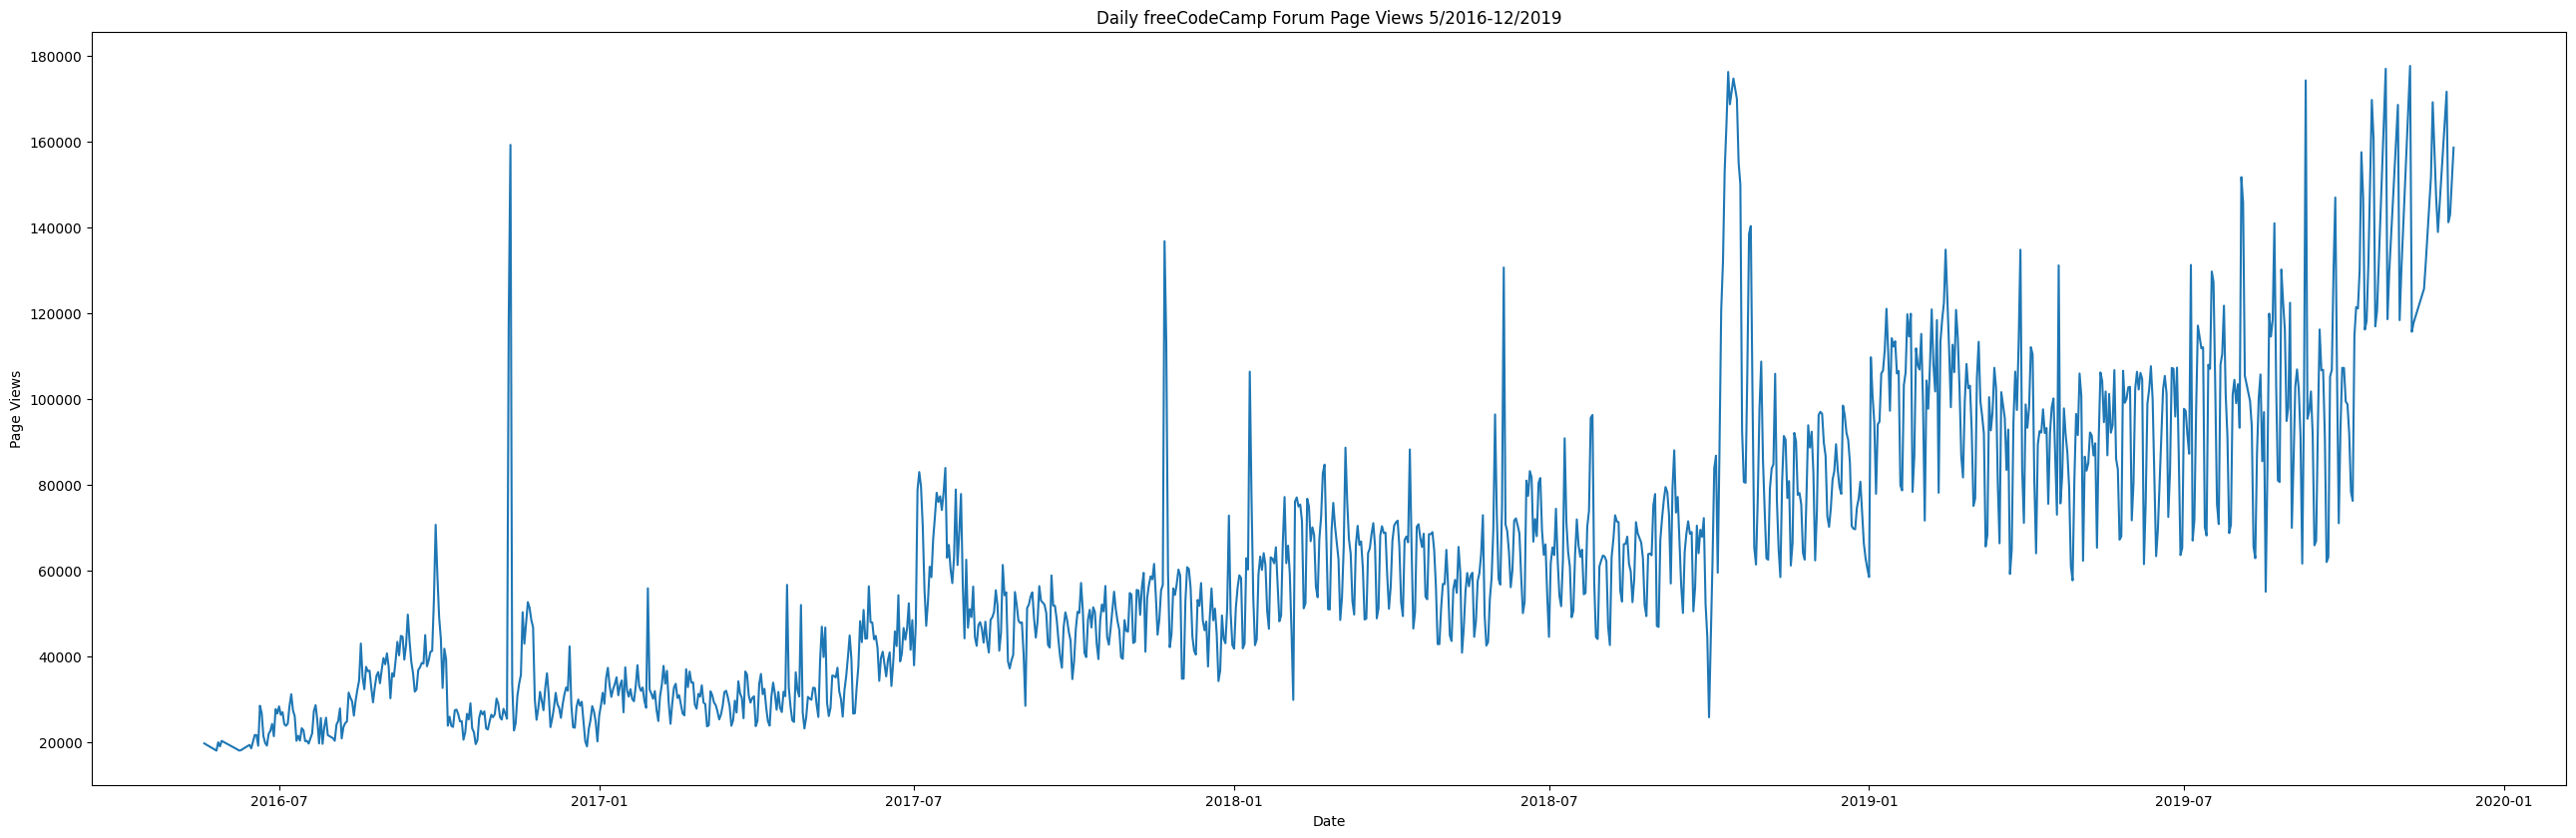

In [23]:
draw_line_plot()


In [40]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar["Years"] = df_bar.index.year
    df_bar["Months"] = df_bar.index.month_name()
    df_bar = pd.DataFrame(df_bar.groupby(["Years", "Months"], sort=False)[
                          "value"].mean().round().astype(int))
    df_bar = df_bar.rename(columns={"value": "Average Page Views"})
    df_bar = df_bar.reset_index()
    missing_data = {
        "Years": [2016, 2016, 2016, 2016],
        "Months": ['January', 'February', 'March', 'April'],
        "Average Page Views": [0, 0, 0, 0]
    }

    df_bar = pd.concat([pd.DataFrame(missing_data), df_bar])

    # Draw bar plot
    fig, ax = plt.subplots(figsize=(19.2, 10.8), dpi=100)
    ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")

    chart = sns.barplot(data=df_bar, x="Years",
                        y="Average Page Views", hue="Months", palette="tab10")
    chart.set_xticklabels(chart.get_xticklabels(),
                          rotation=90, horizontalalignment='center')

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig


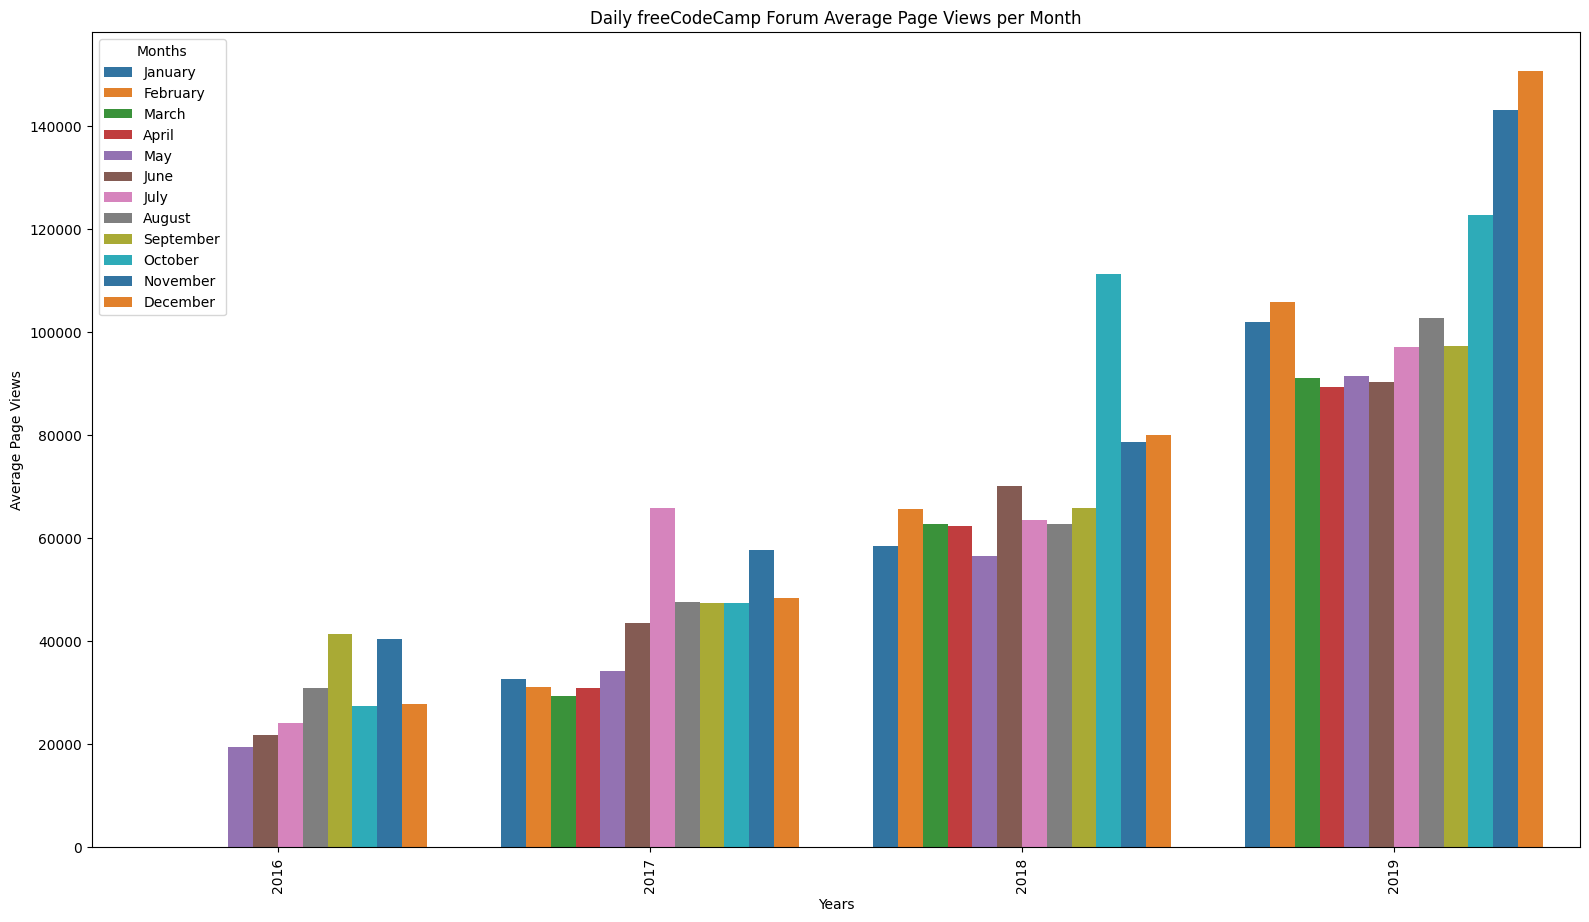

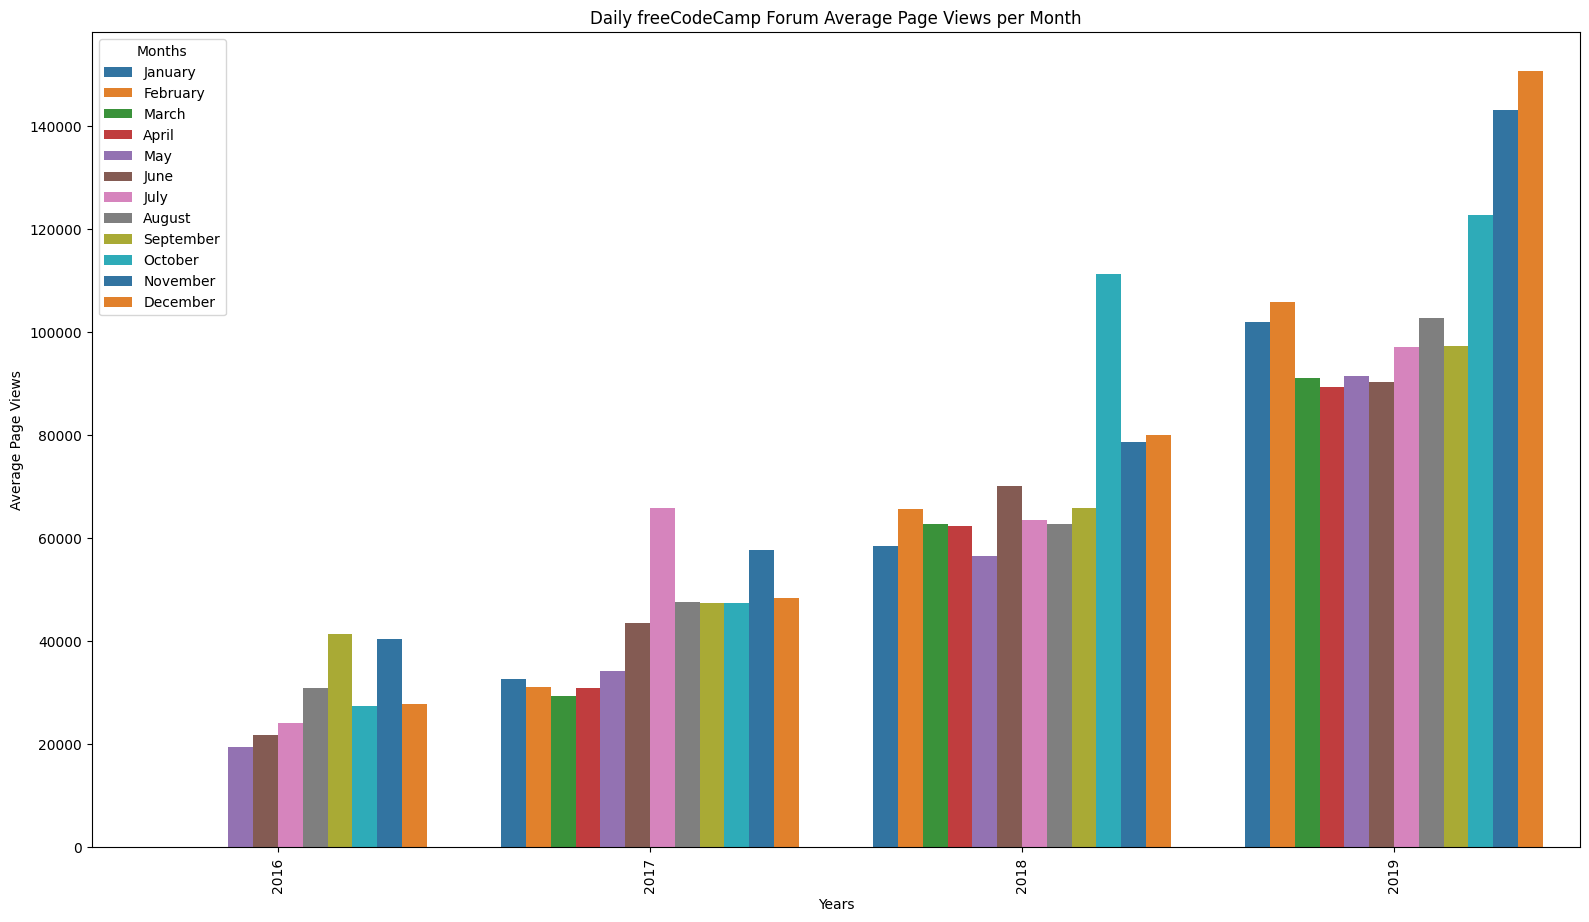

In [41]:
draw_bar_plot()


In [43]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2, figsize=(32, 10), dpi=100)

    # Yearly boxplot
    sns.boxplot(data=df_box, x="year", y="value", ax=axes[0])
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")

    # Monthly boxplot
    month_order = ["Jan", "Feb", "Mar", "Apr", "May",
                   "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    sns.boxplot(data=df_box, x="month", y="value",
                order=month_order, ax=axes[1])
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


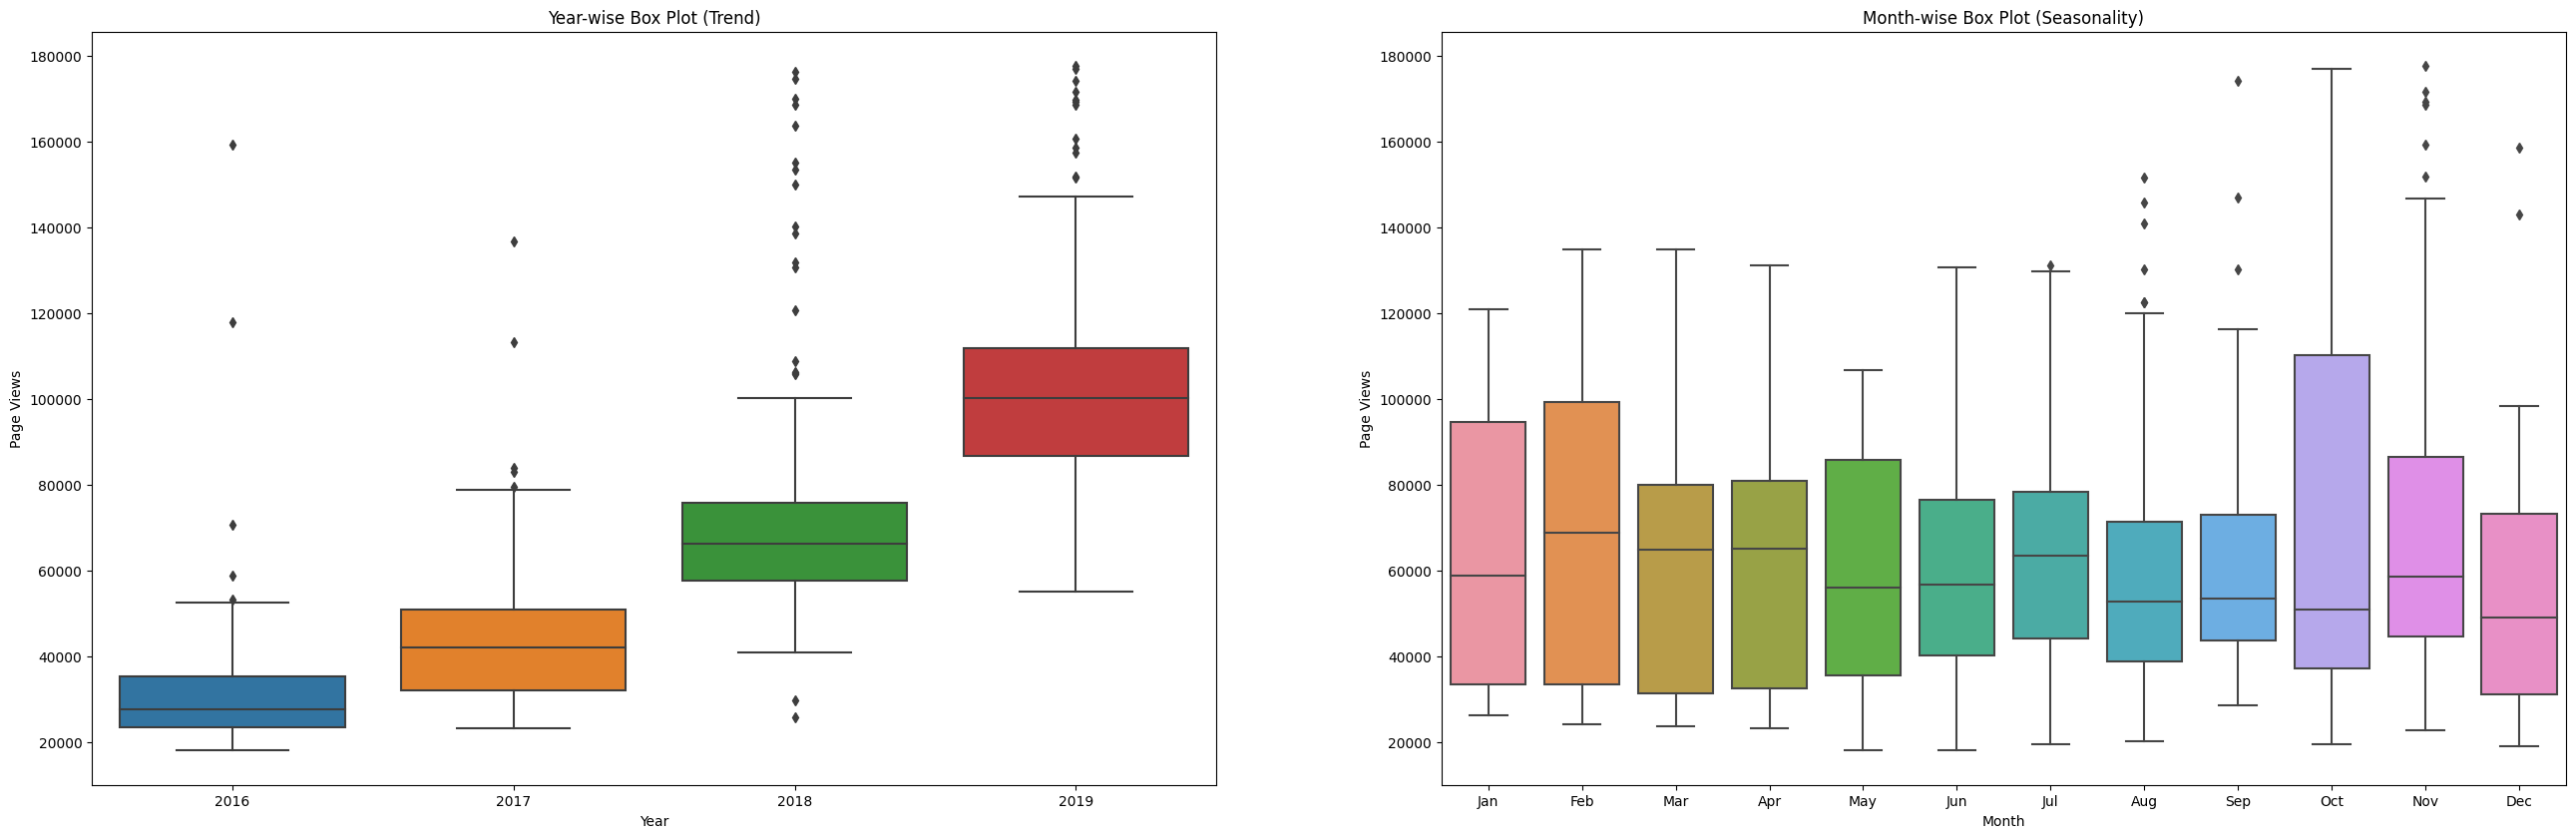

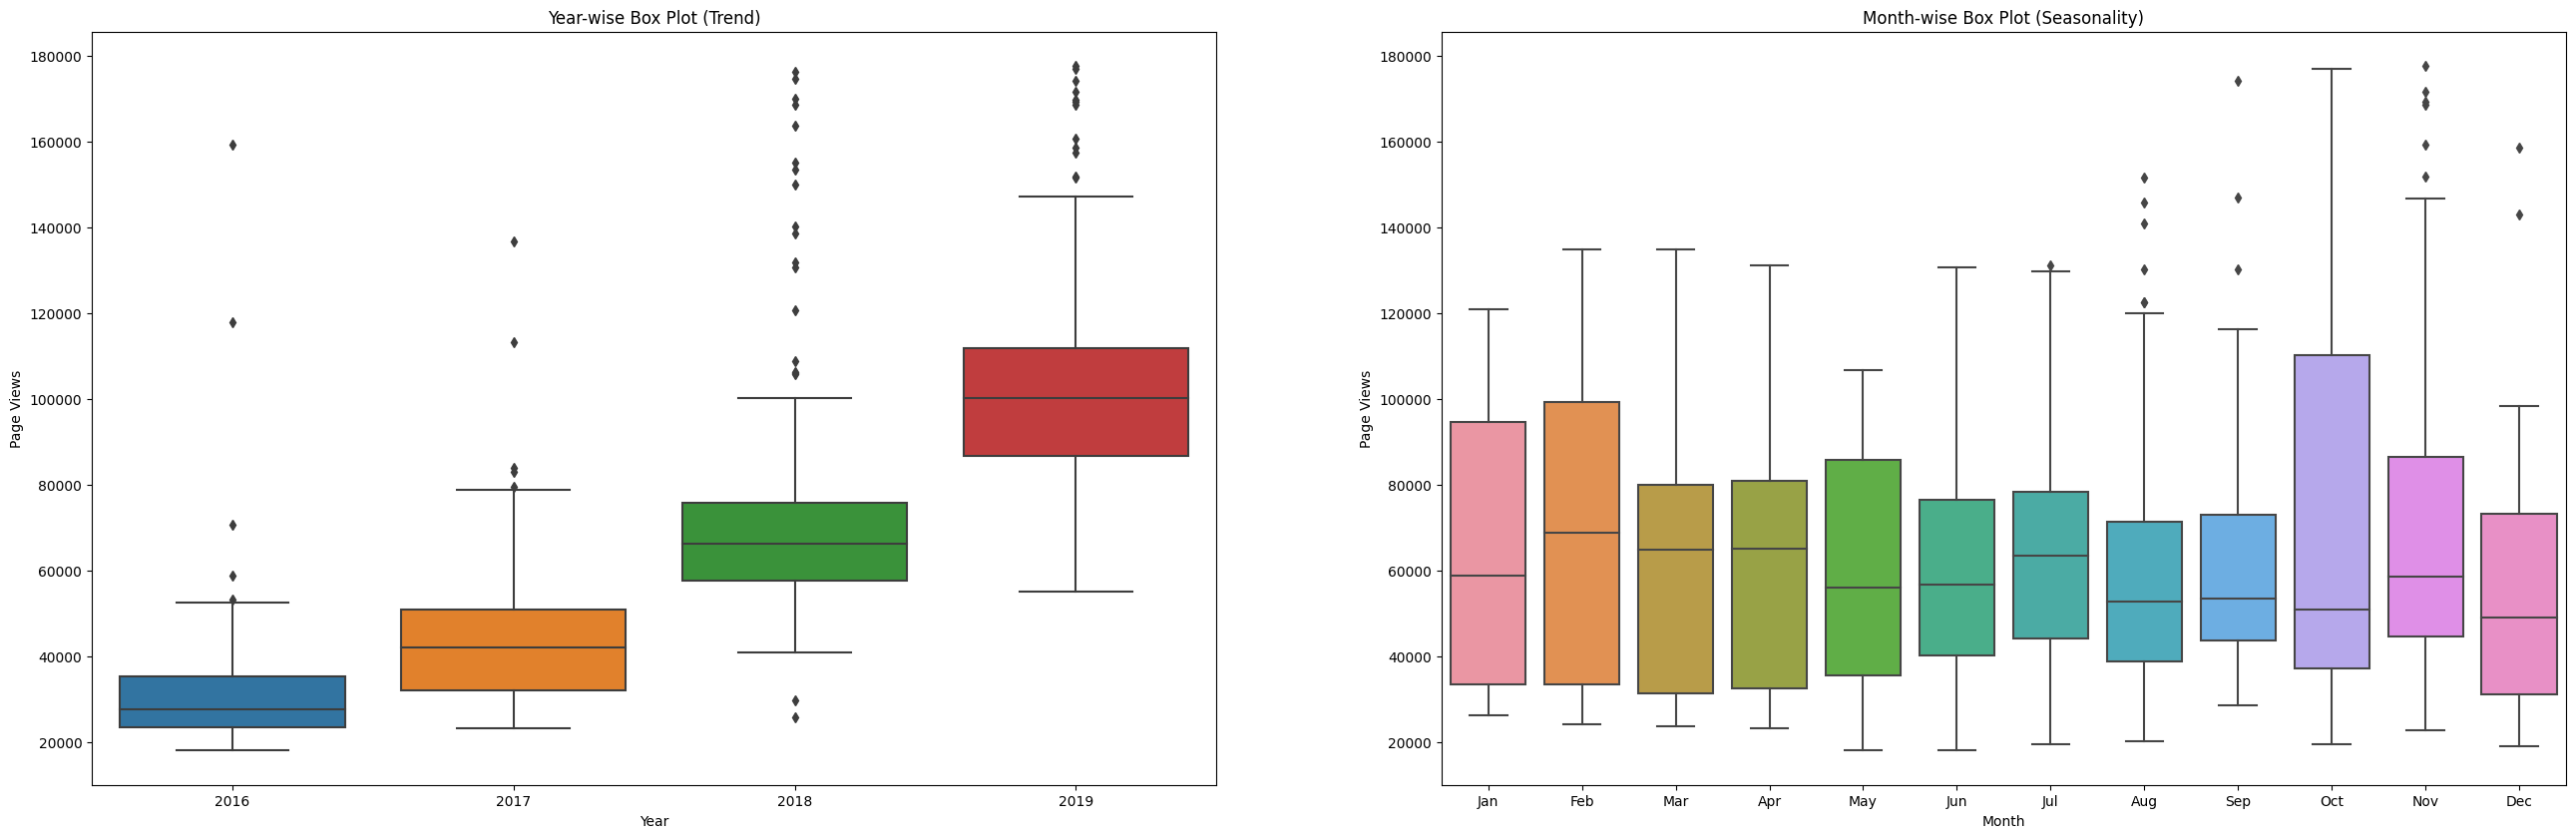

In [44]:
draw_box_plot()
